<a id='Title-Basic-ConvNet'></a>
<h1 style="color:SlateGray;">Basic ConvNet</h1>

**Input dataset**

MNIST: a set of 28x28 grayscale images of single, handwritten digits.

**Output classification**

Digit with the highest probability in the probability distribution of the 10 possible classes [0, 9].

<h2 style="color:SlateGray;">Background</h2>

**Layers**

[*Dense*](1_Image_Classification.ipynb#Layers-Dense)

<a id='Layers-Conv2D'></a>
*Conv2D*

Extracts local features from a 2-dimensional tensor.

Applies a convolution operation using a small parameterized window.

<a id='Layers-MaxPooling2D'></a>
*MaxPooling2D*

Filters redundant neurons by summarizing learned local patterns.

Utilizes a striding window, similarly to convolution, to pick out local maximum values.

<a id='Layers-Flatten'></a>
*Flatten*

Connecting layer used when a multi-dimensional layer is followed by a single-dimensional layer.

Reduces dimensionality of a tensor such as $(x, y, z) \rightarrow (x^\prime)$.

**Activations**

[*relu*](1_Image_Classification.ipynb#Activations-relu)

[*sigmoid*](2_Binary_Classification.ipynb#Activations-sigmoid)
		
**Optimizers**

[*rmsprop*](1_Image_Classification.ipynb#Optimizers-rmsprop)
		
**Loss functions**

[*binary_crossentropy*](2_Binary_Classification.ipynb#Loss-functions-binary_crossentropy)

<h2 style="color:SlateGray;">Overview</h2>

Revisiting a previous example to explore the effects of a different model on loss and accuracy.

Using a convolutional neural network to learn local patterns from images before attempting to perform classification.

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.2'

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
from keras.utils import to_categorical

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [6]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_images,
                    train_labels,
                    epochs=20,
                    batch_size=64)

Epoch 1/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.1705 - acc: 0.9466
Epoch 2/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0473 - acc: 0.9857
Epoch 3/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0316 - acc: 0.9904
Epoch 4/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0244 - acc: 0.9927
Epoch 5/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.0193 - acc: 0.9943
Epoch 6/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0153 - acc: 0.9953
Epoch 7/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0126 - acc: 0.9961
Epoch 8/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0104 - acc: 0.9969
Epoch 9/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0102 - acc: 0.9971
Epoch 10/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0077 - 

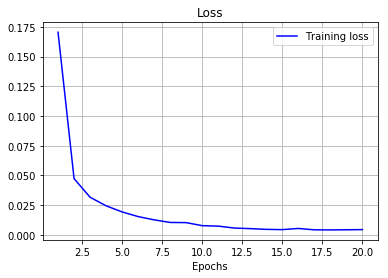

In [8]:
import matplotlib.pyplot as plt

training_loss = history.history['loss']
epochs = range(1, 21)

plt.plot(epochs, training_loss, 'b', label='Training loss')
plt.xlabel('Epochs')
plt.title('Loss')
plt.legend()
plt.grid()

plt.show()

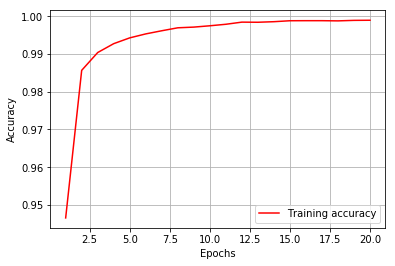

In [9]:
training_accuracy = history.history['acc']

plt.plot(epochs, training_accuracy, 'r', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 119us/step


In [11]:
test_loss

0.060834549992667124

In [12]:
test_acc

0.9925